Source here: https://bible4u.net/en/download#en, format: Jewish Publication Society Old Testament


In [85]:
from collections import Counter
import xml.etree.ElementTree as ET
import pandas as pd
import plotly.express as px
import spacy

In [86]:
xml_file_path = '/Users/dixonb01/Downloads/JPS.xml'

tree = ET.parse(xml_file_path)
root = tree.getroot()

data = []
for book in root.findall(".//BIBLEBOOK"):
    book_name = book.get("bname")
    for chapter in book.findall(".//CHAPTER"):
        chapter_number = chapter.get("cnumber")
        for verse in chapter.findall(".//VERS"):
            verse_number = verse.get("vnumber")
            verse_text = verse.text.strip()
            data.append({"Book": book_name, "Chapter": chapter_number, "Verse": verse_number, "Text": verse_text})


df = pd.DataFrame(data)

# Formatting as ints as they were strings by default
df['Chapter'] = df['Chapter'].astype(int)
df['Verse'] = df['Verse'].astype(int)

df.head()

Book  Chapter  Verse                                               Text
0  Genesis        1      1  IN THE beginning God created the heaven and th...
1  Genesis        1      2  Now the earth was unformed and void, and darkn...
2  Genesis        1      3  And God said: 'Let there be light.' And there ...
3  Genesis        1      4  And God saw the light, that it was good; and G...
4  Genesis        1      5  And God called the light Day, and the darkness...

Q1. Map into the tanakh groupings, using mappings from Wikipedia [here](https://en.wikipedia.org/wiki/Torah). Note: Haftorah is from book of prophets. 

In [87]:
five_books_moses_torah = ['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy']
prophets_nevim = ['Joshua', 'Judges', 'I Samuel', 'II Samuel', 'I Kings', 'II Kings', 
                  'Isaiah', 'Jeremiah', 'Ezekiel', 'Hosea', 'Joel', 'Amos', 'Obadiah', 
                  'Jonah', 'Micah', 'Nahum', 'Habakkuk', 'Zephaniah', 'Haggai', 'Zechariah', 'Malachi']
writings_ketuvim = [ 'Psalms', 'Proverbs', 'Job', 'Song of Solomon', 'Ruth', 'Lamentations', 
            'Ecclesiastes', 'Esther', 'Historical', 'Daniel', 'Ezra', 'Nehemiah', 
            'I Chronicles', 'II Chronicles' ]

In [88]:
five_books_mapping = {five_books_moses_torah[i]:'Five books' for i in range(len(five_books_moses_torah)) }
prophets_mapping = {prophets_nevim[i]:'Prophets-Nevim' for i in range(len(prophets_nevim))}
writings_mapping = {writings_ketuvim[i]:'Writings-Ketuvim' for i in range(len(writings_ketuvim))}

five_books_mapping.update(prophets_mapping)
five_books_mapping.update(writings_mapping)

And now we get a position of the books and of the chapters to make sorting easier. 

In [89]:
section_number = {'Five books': 1, 'Prophets-Nevim': 2, 'Writings-Ketuvim': 3}

five_books_pos = {five_books_moses_torah[i]:(i+1) for i in range(len(five_books_moses_torah)) }
prophets_pos = {prophets_nevim[i]:(i+1) for i in range(len(prophets_nevim))}
writings_pos = {writings_ketuvim[i]:(i+1) for i in range(len(writings_ketuvim))}

five_books_pos.update(prophets_pos)
five_books_pos.update(writings_pos)

In [90]:
df['Section'] = df['Book'].map(five_books_mapping)
df['Book number'] = df['Book'].map(five_books_pos)
df['Section number'] = df['Section'].map(section_number)

## Q2. How long are the different books, chapters, and verses?

This approach counts the numbers of characters in each book. 

In [91]:
def joiner(some_list):
    return ' '.join(some_list)

df_text_grouped = df.groupby(['Section', 'Book'])['Text'].agg(list).reset_index()
df_text_grouped['Text'] = df_text_grouped['Text'].apply(joiner) 
df_text_grouped['Text length'] = df_text_grouped['Text'].apply(len)

In [92]:
df_text_grouped

Section             Book  \
0         Five books      Deuteronomy   
1         Five books           Exodus   
2         Five books          Genesis   
3         Five books        Leviticus   
4         Five books          Numbers   
5     Prophets-Nevim             Amos   
6     Prophets-Nevim          Ezekiel   
7     Prophets-Nevim         Habakkuk   
8     Prophets-Nevim           Haggai   
9     Prophets-Nevim            Hosea   
10    Prophets-Nevim          I Kings   
11    Prophets-Nevim         I Samuel   
12    Prophets-Nevim         II Kings   
13    Prophets-Nevim        II Samuel   
14    Prophets-Nevim           Isaiah   
15    Prophets-Nevim         Jeremiah   
16    Prophets-Nevim             Joel   
17    Prophets-Nevim            Jonah   
18    Prophets-Nevim           Joshua   
19    Prophets-Nevim           Judges   
20    Prophets-Nevim          Malachi   
21    Prophets-Nevim            Micah   
22    Prophets-Nevim            Nahum   
23    Prophets-Nevim          Obadiah   
24    Prophets-Nevim        Zechariah   
25    Prophets-Nevim        Zephaniah   
26  Writings-Ketuvim           Daniel   
27  Writings-Ketuvim     Ecclesiastes   
28  Writings-Ketuvim           Esther   
29  Writings-Ketuvim             Ezra   
30  Writings-Ketuvim     I Chronicles   
31  Writings-Ketuvim    II Chronicles   
32  Writings-Ketuvim              Job   
33  Writings-Ketuvim     Lamentations   
34  Writings-Ketuvim         Nehemiah   
35  Writings-Ketuvim         Proverbs   
36  Writings-Ketuvim           Psalms   
37  Writings-Ketuvim             Ruth   
38  Writings-Ketuvim  Song of Solomon   

                                                 Text  Text length  
0   THESE ARE the words which Moses spoke unto all...       147177  
1   NOW THESE are the names of the sons of Israel,...       170160  
2   IN THE beginning God created the heaven and th...       198508  
3   THE LORD called unto Moses, and spoke unto him...       126476  
4   AND THE LORD spoke unto Moses in the wildernes...       175784  
5   THE WORDS of Amos, who was among the herdmen o...        21651  
6   NOW IT came to pass in the thirtieth year, in ...       206021  
7   THE BURDEN which Habakkuk the prophet did see....         7855  
8   IN THE second year of Darius the king, in the ...         5808  
9   THE WORD of the LORD that came unto Hosea the ...        27395  
10  NOW KING David was old and stricken in years; ...       127943  
11  NOW THERE was a certain man of Ramathaim-zophi...       130546  
12  AND MOAB rebelled against Israel after the dea...       121842  
13  AND IT came to pass after the death of Saul, w...       107462  
14  THE VISION of Isaiah the son of Amoz, which he...       193585  
15  THE WORDS of Jeremiah the son of Hilkiah, of t...       224318  
16  THE WORD of the LORD that came to Joel the son...        10700  
17  NOW THE WORD of the LORD came unto Jonah the s...         6778  
18  NOW IT came to pass after the death of Moses t...       101544  
19  AND IT came to pass after the death of Joshua,...        99502  
20  THE BURDEN of the word of the LORD to Israel b...         9237  
21  THE WORD of the LORD that came to Micah the Mo...        16498  
22  THE BURDEN of Nineveh. The book of the vision ...         6783  
23  THE VISION of Obadiah. Thus saith the Lord GOD...         3495  
24  IN THE eighth month, in the second year of Dar...        33180  
25  THE WORD of the LORD which came unto Zephaniah...         8592  
26  IN THE third year of the reign of Jehoiakim ki...        62825  
27  THE WORDS OF the Koheleth, the son of David, k...        28592  
28  NOW IT came to pass in the days of Ahasuerus--...        30575  
29  NOW IN the first year of Cyrus king of Persia,...        40504  
30  ADAM, SETH, Enosh; Kenan, Mahalalel, Jared; En...       111679  
31  AND SOLOMON the son of David was strengthened ...       140194  
32  THERE was a man in the land of Uz, whose name ...        95365  
33  HOW DOTH the city sit 

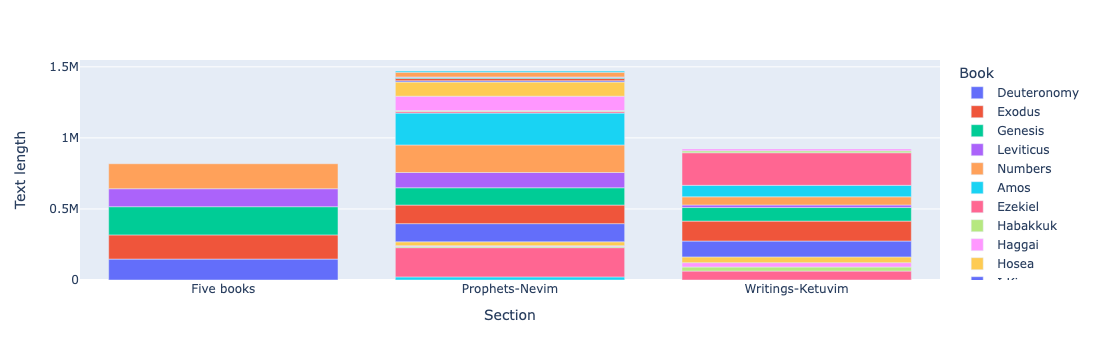

In [93]:
fig = px.bar(df_text_grouped, x='Section', y='Text length', color='Book')
fig.show()

## Q2. How much do different people appear?

First we need to sort the text by the order that it appears. This uses the section and book numbers constructed earlier to avoid alphabetical sorting.  

In [94]:
# Consolidate the text from each chapter on each row 
df_chapters_text = df.groupby(['Section', 'Section number', 'Book', 'Book number', 'Chapter'])['Text'].agg(list).reset_index()
df_chapters_text.sort_values(by=['Section number', 'Book number', 'Chapter'], inplace=True)
df_chapters_text['Text'] = df_chapters_text['Text'].apply(joiner) 
df_chapters_text.reset_index(drop=True,inplace=True)
df_chapters_text

Section  Section number           Book  Book number  Chapter  \
0          Five books               1        Genesis            1        1   
1          Five books               1        Genesis            1        2   
2          Five books               1        Genesis            1        3   
3          Five books               1        Genesis            1        4   
4          Five books               1        Genesis            1        5   
..                ...             ...            ...          ...      ...   
924  Writings-Ketuvim               3  II Chronicles           14       32   
925  Writings-Ketuvim               3  II Chronicles           14       33   
926  Writings-Ketuvim               3  II Chronicles           14       34   
927  Writings-Ketuvim               3  II Chronicles           14       35   
928  Writings-Ketuvim               3  II Chronicles           14       36   

                                                  Text  
0    IN THE beginning God created the heaven and th...  
1    And the heaven and the earth were finished, an...  
2    Now the serpent was more subtle than any beast...  
3    And the man knew Eve his wife; and she conceiv...  
4    This is the book of the generations of Adam. I...  
..                                                 ...  
924  After these things, and this faithfulness, Sen...  
925  Manasseh was twelve years old when he began to...  
926  Josiah was eight years old when he began to re...  
927  And Josiah kept a passover unto the LORD in Je...  
928  Then the people of the land took Jehoahaz the ...  

[929 rows x 6 columns]

Use spaCy's NER library to extract the entities.  

In [95]:
nlp = spacy.load("en_core_web_sm")

In [96]:
def extract_named_persons(text): 
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'PERSON']

In [97]:
df_five_books_ner = df_chapters_text[df_chapters_text['Section'] == 'Five books']
df_five_books_ner['Named persons'] = df_five_books_ner['Text'].apply(extract_named_persons)

/var/folders/kl/0ct3qdh12x95lsh0gvjt_q980000gn/T/ipykernel_49339/3653506614.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Goal is a line graph showing named people coming up and down. So we probably need the top 5-10 named people over the entire book. Maybe we could just focus on the five books to start with. We also need sequential ordering to show passage of time later. 

In [98]:
df_five_books_ner['Overall pos'] = df_five_books_ner.index

/var/folders/kl/0ct3qdh12x95lsh0gvjt_q980000gn/T/ipykernel_49339/1229748754.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
all_names_five_books = [name for chapter in df_five_books_ner['Named persons'] for name in chapter]
c = Counter(all_names_five_books)
top_5 = [name for name, count in c.most_common(15)]
top_5.remove('Thou')
top_5.remove('thou shalt')
top_5.remove('Behold')
top_5.remove('Moab')
top_5.append('Moses')
print(top_5)

['Aaron', 'Jacob', 'Pharaoh', 'Joseph', 'Abraham', 'Isaac', 'Noah', 'Balaam', 'Reuben', 'Balak', 'Sarah', 'Moses']


In [109]:
def name_counter(text, name):
    return text.count(name)

for name in top_5:
    df_five_books_ner.loc[:,name] = df_five_books_ner['Text'].apply(lambda x: name_counter(x, name))

/var/folders/kl/0ct3qdh12x95lsh0gvjt_q980000gn/T/ipykernel_49339/1875978119.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kl/0ct3qdh12x95lsh0gvjt_q980000gn/T/ipykernel_49339/1875978119.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kl/0ct3qdh12x95lsh0gvjt_q980000gn/T/ipykernel_49339/1875978119.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [110]:
df_five_books_ner.head(2)

Section  Section number     Book  Book number  Chapter  \
0  Five books               1  Genesis            1        1   
1  Five books               1  Genesis            1        2   

                                                Text  \
0  IN THE beginning God created the heaven and th...   
1  And the heaven and the earth were finished, an...   

                                       Named persons  Overall pos  Aaron  \
0  [God, God, God, God, God, God, God, God, God, ...            0      0   
1            [Gihon, Cush, Asshur, thou shalt, Adam]            1      0   

   Jacob  Pharaoh  Joseph  Abraham  Isaac  Noah  Balaam  Reuben  Balak  Sarah  \
0      0        0       0        0      0     0       0       0      0      0   
1      0        0       0        0      0     0       0       0      0      0   

   Moses  
0      0  
1      0

In [111]:
df_five_books_ner_melted = pd.melt(df_five_books_ner, id_vars=['Overall pos'], 
        value_vars=top_5)

In [112]:
df_five_books_ner_melted.rename(columns={'variable':'Person name', 'value':'Count'},inplace=True)

In [113]:
df_five_books_ner_melted.head(5)

Overall pos Person name  Count
0            0       Aaron      0
1            1       Aaron      0
2            2       Aaron      0
3            3       Aaron      0
4            4       Aaron      0

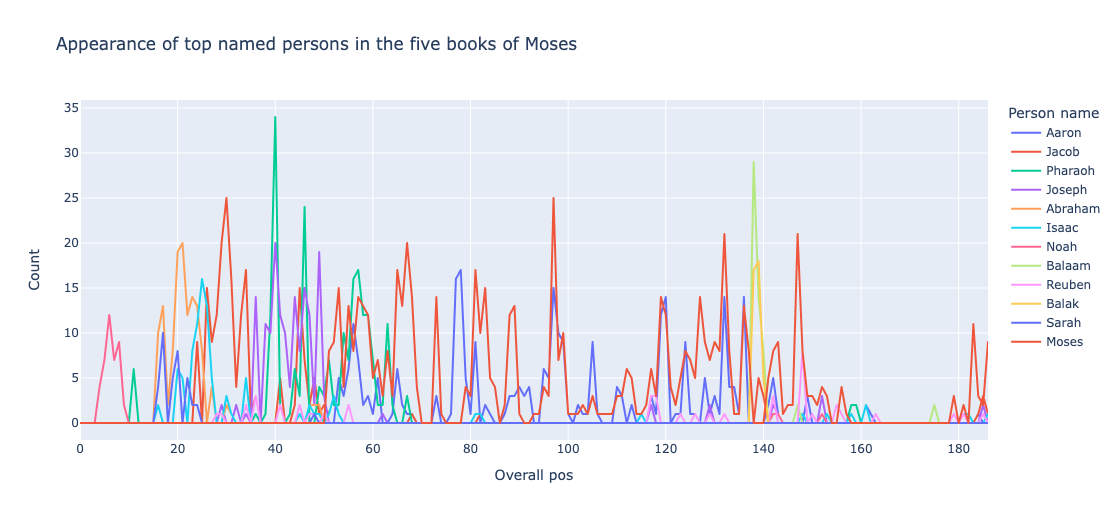

In [114]:
fig = px.line(df_five_books_ner_melted, x='Overall pos', y='Count', color='Person name',
             width=1.3*800, height=1.3*400,
             title='Appearance of top named persons in the five books of Moses')
fig.show()